In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jaxquantum as jqt
import jaxquantum.circuits as jqtc 
import jax.numpy as jnp
from jax import vmap, jit
import matplotlib.pyplot as plt
from jax import config
config.update("jax_enable_x64", True)

In [21]:
def fringes(gamma):
    N = 40
    reg = jqtc.Register([2,N])
    cirq = jqtc.Circuit.create(reg, layers=[])
    cd_length = 2*jnp.sqrt(jnp.pi)
    cirq.append(jqtc.CD(N, cd_length), [0,1])
    # cirq.append(jqtc.X(), 0)
    cirq.append(jqtc.D(N, 1j*gamma), 1)
    cirq.append(jqtc.CD(N, -cd_length), [0,1])
    # cirq.append(jqtc.X(), 0)
    cirq.append(jqtc.D(N, -1j*gamma), 1)
    
    plus_state = (jqt.basis(2,0) + jqt.basis(2,1))/jnp.sqrt(2)
    
    initial_state = plus_state ^ jqt.basis(N,0)
    res = jqtc.simulate(cirq, initial_state)
    final_state = res[-1][-1]
    
    sigma_x_op = jqt.sigmax() ^ jqt.identity(N)
    sigma_x_ep = final_state.dag() @ sigma_x_op @ final_state
    return sigma_x_ep.data[0][0].real

fringes_vmap = vmap(fringes)

In [22]:
# gammas = jnp.linspace(-0.04*77, 0.04*77, 101)
gammas =  jnp.sqrt(jnp.pi)/2  * jnp.linspace(-4, 4, 1001)
sigmax_vals = fringes_vmap(gammas)

In [23]:
alpha_period = jnp.sqrt(jnp.pi)/2
(2*jnp.pi)/alpha_period/2

Array(3.5449077, dtype=float64, weak_type=True)

Text(0.5, 1.0, 'Fringes without Interleaved Pi Pulses')

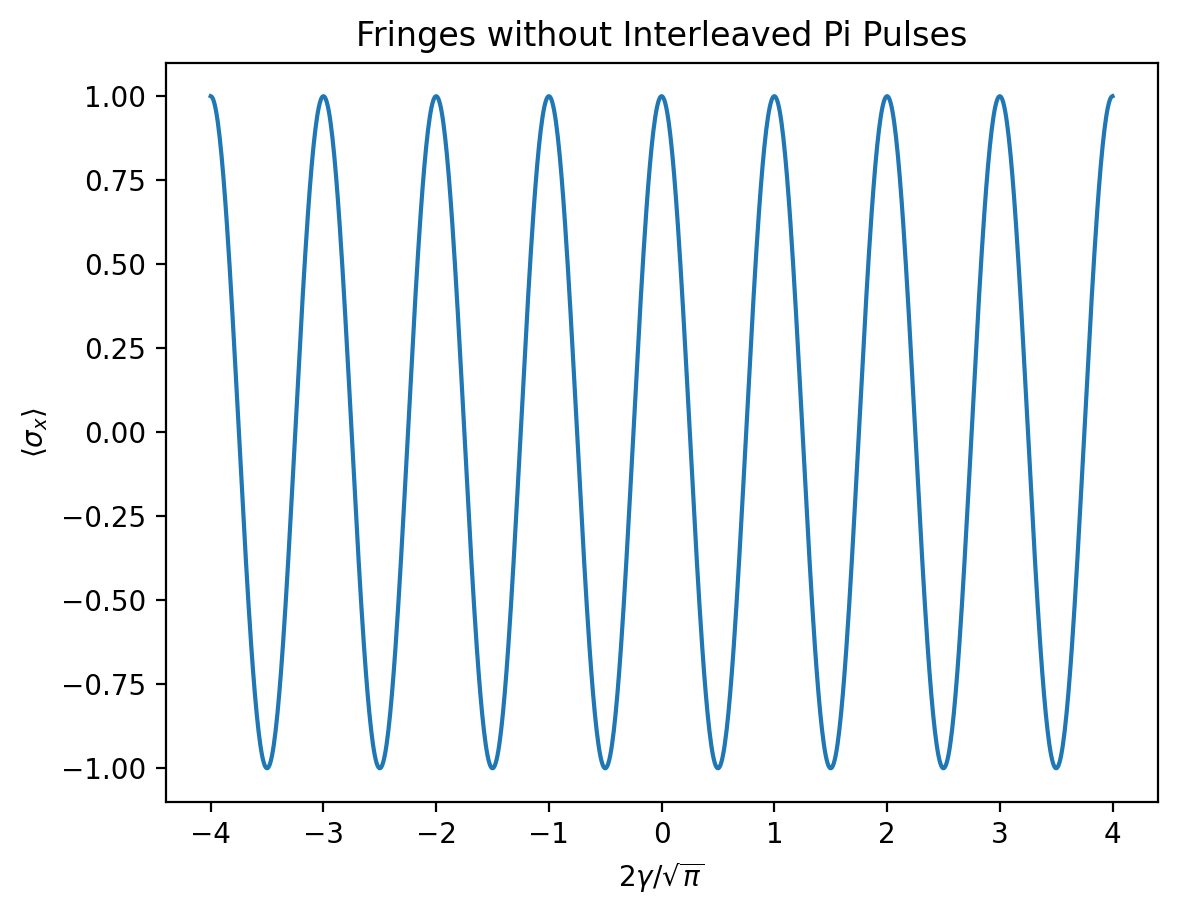

In [24]:
fig, ax = plt.subplots(1,1, dpi=200)

ax.plot(gammas/(jnp.sqrt(jnp.pi)/2), sigmax_vals)
ax.set_xlabel(r'$2\gamma/\sqrt{\pi}$')
ax.set_ylabel(r'$\langle \sigma_x \rangle$')
ax.set_title('Fringes without Interleaved Pi Pulses')